# Module 3 Part 2: Introduction to MongoDB

In this notebook we will introduce [**MongoDB**](https://www.mongodb.org/), a document-oriented NoSQL database.  We will explore the basic modelling constructs to model real world data.  We will install MongoDB locally and interact with the MongoDB service by performing basic CRUD (create, read, update, delete) operations.  We will end with looking at aggregate queries that provide a powerful way to create rich, complex queries.

This module consists of 2 parts:

- **Part 1** - NoSQL
- **Part 2** - Introduction to MongoDB

Each part is provided in a separate notebook file. It is recommended that you follow the order of the notebooks.

# Readings and Resources

We invite you to further supplement this notebook with the following recommended texts.

- Chodorow, K., & Bradshaw, S. (2018). MongoDB: The Definitive Guide, 3rd Edition.  O’Reilly: Boston. http://shop.oreilly.com/product/0636920049531.do


- Bassett, L. (2015). Introduction to JavaScript Object Notation: A To-the-Point Guide to JSON  O’Reilly: Boston.
http://shop.oreilly.com/product/0636920041597.do

<h1>Table of Contents<span class="tocSkip"></span></h1>
<br>
<div class="toc">
<ul class="toc-item">
<li><span><a href="#Module-3-Part-2:-Introduction-to-MongoDB" data-toc-modified-id="Module-3-Part-2:-Introduction-to-MongoDB">Module 3 Part 2: Introduction to MongoDB</a></span>
</li>
<li><span><a href="#Readings-and-Resources" data-toc-modified-id="Readings-and-Resources">Readings and Resources</a></span>
</li>
<li><span><a href="#Table-of-Contents" data-toc-modified-id="Table-of-Contents">Table of Contents</a></span>
</li>
<li><span><a href="#Setup-Notes" data-toc-modified-id="Setup-Notes">Setup Notes</a></span>
<ul class="toc-item">
<li><span><a href="#Install" data-toc-modified-id="Install">Install</a></span>
</li>
<li><span><a href="#Run-MongoDB-on-Windows" data-toc-modified-id="Run-MongoDB-on-Windows">Run MongoDB on Windows</a></span>
</li>
<li><span><a href="#Run-MongoDB-on-Mac" data-toc-modified-id="Run-MongoDB-on-Mac">Run MongoDB on Mac</a></span>
</li>
</ul>
</li>
<li><span><a href="#What-is-MongoDB?" data-toc-modified-id="What-is-MongoDB?">What is MongoDB?</a></span>
<ul class="toc-item">
<li><span><a href="#JSON-Syntax" data-toc-modified-id="JSON-Syntax">JSON Syntax</a></span>
</li>
<li><span><a href="#Document-ID" data-toc-modified-id="Document-ID">Document ID</a></span>
</li>
</ul>
</li>
<li><span><a href="#Connecting-to-a-MongoDB-database" data-toc-modified-id="Connecting-to-a-MongoDB-database">Connecting to a MongoDB database</a></span>
</li>
<li><span><a href="#Modelling-a-Social-Graph" data-toc-modified-id="Modelling-a-Social-Graph">Modelling a Social Graph</a></span>
</li>
<li><span><a href="#Querying-a-Collection" data-toc-modified-id="Querying-a-Collection">Querying a Collection</a></span>
</li>
<li><span><a href="#Counting-Documents" data-toc-modified-id="Counting-Documents">Counting Documents</a></span>
</li>
<li><span><a href="#Inserting-a-Document" data-toc-modified-id="Inserting-a-Document">Inserting a Document</a></span>
</li>
<li><span><a href="#Updating-a-Document" data-toc-modified-id="Updating-a-Document">Updating a Document</a></span>
</li>
<li><span><a href="#Deleting-a-Document" data-toc-modified-id="Deleting-a-Document">Deleting a Document</a></span>
<ul class="toc-item">
<li><span><a href="#Restoring-a-Collection" data-toc-modified-id="Restoring-a-Collection">Restoring a Collection</a></span>
</li>
</ul>
</li>
<li><span><a href="#Aggregate-Queries" data-toc-modified-id="Aggregate-Queries">Aggregate Queries</a></span>
<ul class="toc-item">
<li><span><a href="#Unwinding-and-Grouping-Pipeline" data-toc-modified-id="Unwinding-and-Grouping-Pipeline">Unwinding and Grouping Pipeline</a></span>
</li>
</ul>
</li>
<li><span><a href="#References" data-toc-modified-id="References">References</a></span>
</li>
</ul>
</div>

# Setup Notes

We will be using the MongoDB Community Edition. The MongoDB database **must** be installed and running locally before continuing with this notebook. We will need to install two packages using the Anaconda package manager:

1. [MongoDB](https://www.mongodb.com/): This package contains the MongoDB database.<br><br>

2. [PyMongo](http://api.mongodb.com/python/current/): This package contains the Python driver that will allow us to communicate with the MongoDB database.

## Install

1. Open a command line terminal and execute the following command to install the `mongodb` package.
```console
conda install -c anaconda mongodb
```

2. Open a command line terminal and execute the following command to install the `pymongo` package.
```console
conda install -c anaconda pymongo
```

## Run MongoDB on Windows

1. MongoDB requires a data directory to store all data. MongoDB’s default data directory path is `\data\db`. Create this folder using the following command from a Command Prompt:
```console
md \data\db
```

2. To start MongoDB, run `mongod.exe`. From the Command Prompt:
```console
"C:\Program Files\MongoDB\Server\3.2\bin\mongod.exe"
```

## Run MongoDB on Mac

1. MongoDB requires a data directory to store all data. MongoDB’s default data directory path is `/data/db`. Create this folder using the following commands from a Terminal. Note that we run the command as a super user using the `sudo` command:
```console
sudo mkdir -p /data/db/
```

2. To start MongoDB, run `mongod` from the Terminal. Note that we run the command as a super user using the `sudo` command:
```console
sudo mongod 
```

**NOTE**: Please make sure that your environment is based on Python 3 (Python 3.6 is best and has worked best for most students). If you are creating a new environment, please activate the environment and open Jupyter notebook from a terminal. Alternatively, you can launch Jupyter notebook from Anaconda Navigator. You may also want to update your libraries such as `numpy`, `pandas` and Jupyter notebooks depending on your configuration.

For Mac users, if you are not able to create a folder called `/data/db` due to any permission issues, you may simply use a tarball that is available here along with instructions: https://docs.mongodb.com/manual/tutorial/install-mongodb-on-os-x-tarball/.

# What is MongoDB?

As mentioned, MongoDB is a NoSQL document-oriented database.  Thus, it has all of the following characteristics and benefits.

- **Document store**: Data is stored as documents that are based on JSON syntax.


- **Horizontal scaling**: Data can be replicated across multiple systems providing high availability and fault tolerance. Thus, if one system fails the data can still be accessed from other systems.


- **Model flexibility**: The database can store structured, semi-structured, and unstructured data.


- **Open source**: MongoDB is distributed under an open-source license.

## JSON Syntax

JavaScript Object Notation (JSON) is an open, human and machine-readable standard that supports basic data types such as: numbers, strings, and boolean values, as well as arrays and hashes. MongoDB uses this format to encode its documents.

The following sample document highlights the structure of a MongoDB document.
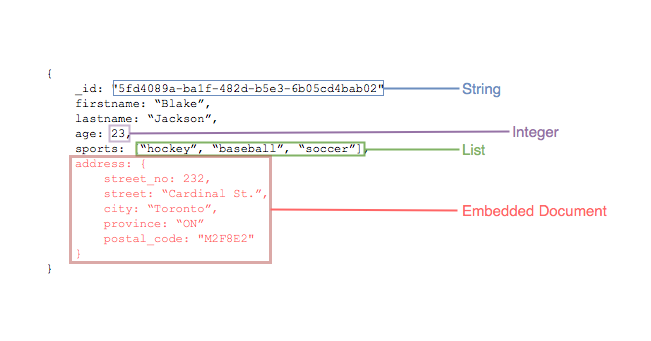
<center><b>Figure 1</b>: Sample JSON MongoDB document</center>

The document above adheres to the JSON syntax and encases all the fields of the document with braces (i.e. '{' and '}'). Each field is made up of key-value pairs that are delimited by commas. A list of values are encased in square brackets (i.e. '[' and ']'), and values in the list are delimited by commas. For more information on the JSON syntax refer to [w3schools.com - JSON Syntax site](https://www.w3schools.com/js/js_json_syntax.asp).

## Document ID

Notice that the MongoDB document has an `_id` field. This field is a unique identifier: usually a string, a URI  (Uniform Resource Identifier), or a path. This identifier is indexed to speed up document retrieval. This identifier is also used as a reference identifier to link one document to another. For example, we can separate out the embedded address document shown in Figure 1 into a separate document and reference the document using the `_id` field shown in Figure 2.

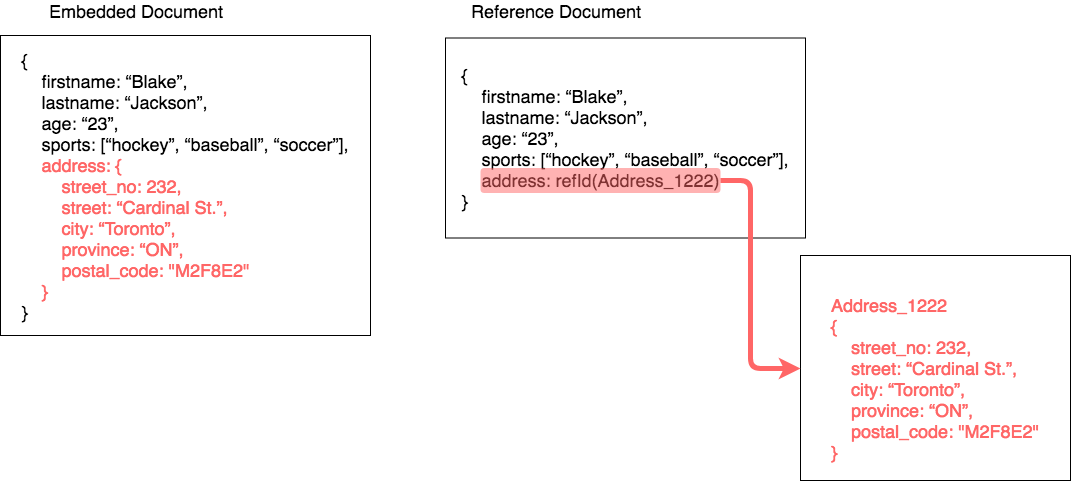
<center><b>Figure 2</b>: Linking documents using '_id' field</center>

Documents are addressed in the database via a unique key that represents the document. This key is a simple identifier (or ID) &mdash; typically a string, a URI, or a path. The key can be used to retrieve the document from the database. Typically, the database retains an index on the key to speed up document retrieval and in some cases the key is required to create or insert the document into the database.

In [1]:
import json
import datetime
import pymongo
import pandas as pd
import numpy as np
from pymongo import MongoClient
print('Mongo version', pymongo.__version__)

Mongo version 3.7.2


# Connecting to a MongoDB database

We first need to connect to our locally running MongoDB database.  We will use the MongoClient to connect to a local `social_graph` database that is running on port 27017 (this is the default port).

In [2]:
client = MongoClient('localhost', 27017)
db = client.social_graph

# Modelling a Social Graph

We will look at modelling a social graph that will store information where a person lives and works.  We will define 3 document types: Employee, Address, and Workplace.  Note that both an Employee and Workplace can have an Address.  We can model this as follows:

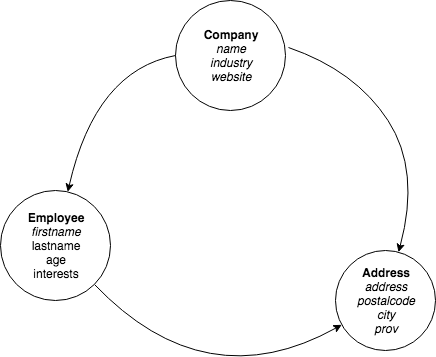
<center><b>Figure 3</b>: Social graph showing the relationships between Employee, Address and Workplace</center>

Figure 4 shows the JSON documents for each type of document. Here we model an employee named 'Emilie Woods' that is employed by 'Union Planters Corp' and lives at '1504 Vecoc Square, Calgary, AB, R70 6G5'. In addition, we have modelled 'Union Planters Corp' to be located at '573 Wojhas Square, Victoria, BC, A7D 5A3'. Notice the documents are linked by their IDs.

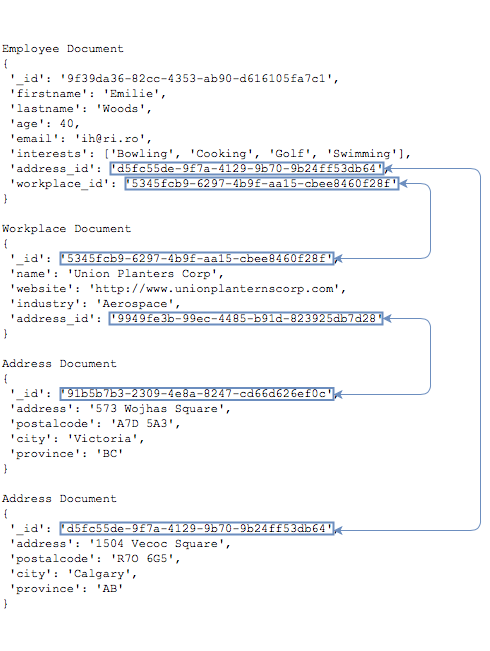
<center><b>Figure 4</b>: Illustration showing how ID fields are used to link JSON documents</center>

We will import sample data from three JSON files into our `social_graph` database. The sample data is based on the above model. We will make use of the `mongoimport` command line tool to import the data into three collections. A collection is a grouping of documents.  

In [ ]:
# Let's delete any existing collections in our database
db.workplace.drop()
db.address.drop()
db.employee.drop()

# Import our files into our three collections
with open('Data/Employee.json') as f:
    db.employee.insert_many(json.load(f))
with open('Data/Workplace.json') as f:
    db.workplace.insert_many(json.load(f))
with open('Data/Address.json') as f:
    db.address.insert_many(json.load(f))

# Querying a Collection

A MongoDB collection provides the following search functions:

- `find_one`: Returns the first document in the collection.
- `find`: Returns a cursor that represents the list of matching documents based a query.

Both functions can take an optional query and/or projection argument. The query argument defines conditions that will be used to select documents from the collection, whereas the projection argument determines which attributes of the document should be returned from the query. The query language is very rich and supports many basic query directives that are outlined at [**https://docs.mongodb.com/v3.2/tutorial/query-documents/**](https://docs.mongodb.com/v3.2/tutorial/query-documents/).  We will explore ways to query our data.  

The following query searches for all employees that are less than 25 years old and returns their `firstname`, `lastname` and `age`. Notice that each document in the query returns the `_id` field so that we can reference the specific document in the collection if we need to.

In [ ]:
cursor = db.employee.find({"age": {"$lt": 25}}, {"firstname","lastname","age"})

# display results in a dataframe so that we can display results in a pretty table
pd.DataFrame(list(cursor)) 

Now, let's do the same query but this time ordering the results by `age` in ascending order and `lastname` in descending order.

In [ ]:
order_cursor = db.employee.find({"age": {"$lt": 25}}, {"firstname","lastname","age"}).sort([
        ("age", pymongo.ASCENDING),
        ("lastname", pymongo.DESCENDING)
     ])
pd.DataFrame(list(order_cursor)) 

If we want only one document from our query, we can just use the `find_one` function instead. In this case, the first document in the collection, in its natural order, is returned. 

In [ ]:
db.employee.find_one({"age": {"$lt": 25}}, {"firstname","lastname","age"})

# Counting Documents

MongoDB provides a method called `count_documents` to carry out analytical queries such as counting documents.  Let's construct a query to find the number of people working at "Bell Microproducts Inc.".

In [ ]:
# Let's search for the company by name from the workplace collection
BellMicroproducts = db.workplace.find_one({"name" : "Bell Microproducts Inc."})

# Next, we can count the number of documents that reference the BellMicroproducts document
employee_count = db.employee.count_documents({ "workplace_id": BellMicroproducts["_id"] } )

print("There are " + str(employee_count) + " employees working at " + BellMicroproducts["name"])

Let's create another interesting query where we want to find the number of employees that are between 20 and 80 years old, but are also not 30 years old.

In [ ]:
employee_count = db.employee.count_documents(
    {"$and":
        [
            { "age": 
                {"$gt": 20, "$lt": 80} # 20 < age < 80
            }, 
            {"age":
                {"$ne":30}             # age != 30
            }
        ]
    })

print("There are " + str(employee_count) + " employees that are between 20 and 80 years old but also not 30 years old.")

# Inserting a Document

Inserting a document is performed by one of the following functions on a collection:

- `insert_one`: Inserts only one document into a collection.
- `insert_many`: Inserts a list of documents into a collection.

Let's look at adding a new address to our address collection. To make it interesting, let's add an address that has a suite number. Note that none of our existing addresses have a suite number. We are able to do this because MongoDB collections are very flexible and can store documents with different structures.

In [ ]:
db.address.insert_one({
    "suite": "553",
    "address": "25 Bremner Dr.",
    "city": "Toronto",
    "province": "ON",
    "postalcode": "M5E U8Y"
})

Let's find the document we just added by looking at the last 5 documents that were inserted into the collection.  

In [ ]:
query_result = db.address.find() \
              .sort(
                    '$natural',  # sort based on the order the document was inserted
                     pymongo.DESCENDING) \
              .limit(5) # only look at the last 5 inserted documents

#Print the result in a table
pd.DataFrame(list(query_result))

Note that MongoDB generates a unique ID for a newly inserted document. A new attribute called `suite` contains the suite number for a document. None of the other documents have a `suite` value.

Let's add a list of addresses using the `insert_many` function as follows.

In [ ]:
new_address = db.address.insert_many([
    {
        "address": "7115 Pilgrim St.",
        "city": "Markham",
        "province": "ON",
        "postalcode": "L5E X2Y"
    },
    {
        "address": "8116 Evergreen Lane",
        "city": "Vancouver",
        "province": "BC",
        "postalcode": "N5M A1E"
    },
    {
        "address": "23 Edgewood Dr.",
        "city": "Calgary",
        "province": "AB",
        "postalcode": "Z8A O2V"
    },
])

Let's find the addresses we just added by searching the collection by their IDs.

In [ ]:
pd.DataFrame(list(db.address.find({"_id": {"$in": new_address.inserted_ids}})))

# Updating a Document

A MongoDB collection provides the following update functions:

- `update_one`: Modifies one document in the collection.
- `update_many`: Modifies a list of matching documents based on the query.

Again, both functions can take an optional query argument. The query object defines conditions that will be used to update documents in the collection. 

In [ ]:
update_result = db.workplace.update_one(
      { "name" : "Kemet Corp." },
      { "$set": { "industry" : "Computers" } }
);

In [ ]:
print("Update Acknowledged:" + str(update_result.acknowledged))
print("Modified Count:" + str(update_result.modified_count))

Let's do another query and change the industry type of all 'Finance' companies to 'Banking'.

In [ ]:
update_result = db.workplace.update_many(
      { "industry" : "Finance" },
      { "$set": { "industry" : "Banking" } }
);

In [ ]:
print("Update Acknowledged:" + str(update_result.acknowledged))
print("Modified Count:" + str(update_result.modified_count))

# Deleting a Document

A MongoDB collection provides the following delete functions:

- `delete_one`: Deletes one document from a collection.
- `delete_many`: Deletes a list of documents from a collection.

Similar to other CRUD operations, the delete functions take a query argument.  The query object defines conditions that will be used to delete documents from the collection. 

In [ ]:
delete_result = db.address.delete_one({"address":"8116 Evergreen Lane"})

The delete results provide information that confirms that the document was deleted from the collection.

In [ ]:
print("Delete Acknowledged:" + str(delete_result.acknowledged))
print("Delete Count:" + str(delete_result.deleted_count))

Let's now delete all addresses in the city of Calgary. Before we delete the addresses, let's count all addresses in the city of Calgary.

In [ ]:
print("There are", str(db.address.count_documents({"city": "Calgary"})), "Address in Calgary:")

In [ ]:
# delete all addresses in the city of Calgary
delete_result = db.address.delete_many({"city":"Calgary"})

In [ ]:
print("Delete Acknowledged:" + str(delete_result.acknowledged))
print("Delete Count:" + str(delete_result.deleted_count))

We've just deleted 22 addresses. Let's query the address collection again to see if there are any addresses in Calgary.

In [ ]:
print("Number of Address in Calgary after deleting addresses: " + str(db.address.count_documents({"city": "Calgary"})))

## Restoring a Collection

MongoDB does not provide a simple rollback operation to restore a collection to a specific state. Restoring a collection to a specific snapshot requires restoring from a backup. More information can be found in the MongoDB documentation: [Restore a Single Database/Collection](https://docs.opsmanager.mongodb.com/current/tutorial/restore-single-database/).

# Aggregate Queries

Aggregate queries utilize <b>pipelines</b> to produce rich, complex queries.  If you're more familiar with SQL, the [**SQL aggregation comparison document**](https://docs.mongodb.com/manual/reference/sql-aggregation-comparison/) is a great reference to translate SQL statements to aggregate queries. 

A pipeline is made of stages.  At each stage, the data undergoes a transformation that ends with the computed result.  Let's look at a simple aggregate query that makes use of the `$match` and `$limit` operators to create a filtered result.  We will create a pipeline to search for all employees that are older than 50 and limit our search to 2 results.

In [ ]:
pipeline = [
    {"$match":
     {
         "age": {
             "$gt" : 50  # only find employees that are older than 50
         }
     }
    },
    {"$limit": 2}  # limit our results to only 2 documents
]

list(db.employee.aggregate(pipeline))

As expected, the result is made up of 2 documents. Note that our query result has `address_id` and `workplace_id` that link to an 'Address' and 'Workplace' document respectively. Wouldn't it be great if we could join the workplace and address information into our query result so that our query contains all the human readable information? Fortunately, we can accomplish this by making use of the `$lookup` operator. Let's add 2 new steps to our pipeline that will join information from the workplace and address collection.

In [ ]:
pipeline = [
    {"$match":
     {
         "age": {
             "$gt" : 50  # only find employees that are older than 50
         }
     }
    },
    {"$limit": 2},  # limit our results to only 2 documents
    {"$lookup": 
     { 
         "from": "workplace",  # execute this pipeline operation on the workplace collection
         "localField": "workplace_id",  # lookup the workplace_id field in our employee collection
         "foreignField": "_id",  # match out localField (i.e. workplace_id) with the _id field in the workplace collection
         "as": "workplace" # store the resulting information in a field name 'workplace'
     }
    },
    {"$lookup": 
     { 
         "from": "address",  # execute this pipeline operation on the address collection
         "localField": "address_id",  # lookup the address_id field in our employee collection
         "foreignField": "_id",  # match out localField (i.e. address_id) with the _id field in the address collection
         "as": "address"  # store the resulting information in a field name 'address'
     }
    }
]

query_result = list(db.employee.aggregate(pipeline))
query_result

As you can see from the resulting query, we now have the workplace and address information as embedded documents in our query result.

## Unwinding and Grouping Pipeline

Let's try something more complex and consider creating an aggregate query that finds the number of employees, grouped by interest. We will define two stages in our pipeline:

1. **Unwinding stage**: For each document in our collection we will "unwind" the document based on the list of interests.  For each interest, we will create a separate document.<br><br>

2. **Grouping stage**: Now that we have separate documents for each interest, we can count the documents grouped by interest.

The pipeline can be visualized as follows. Note that the unwinding stage creates a separate document for each Employee's interest.

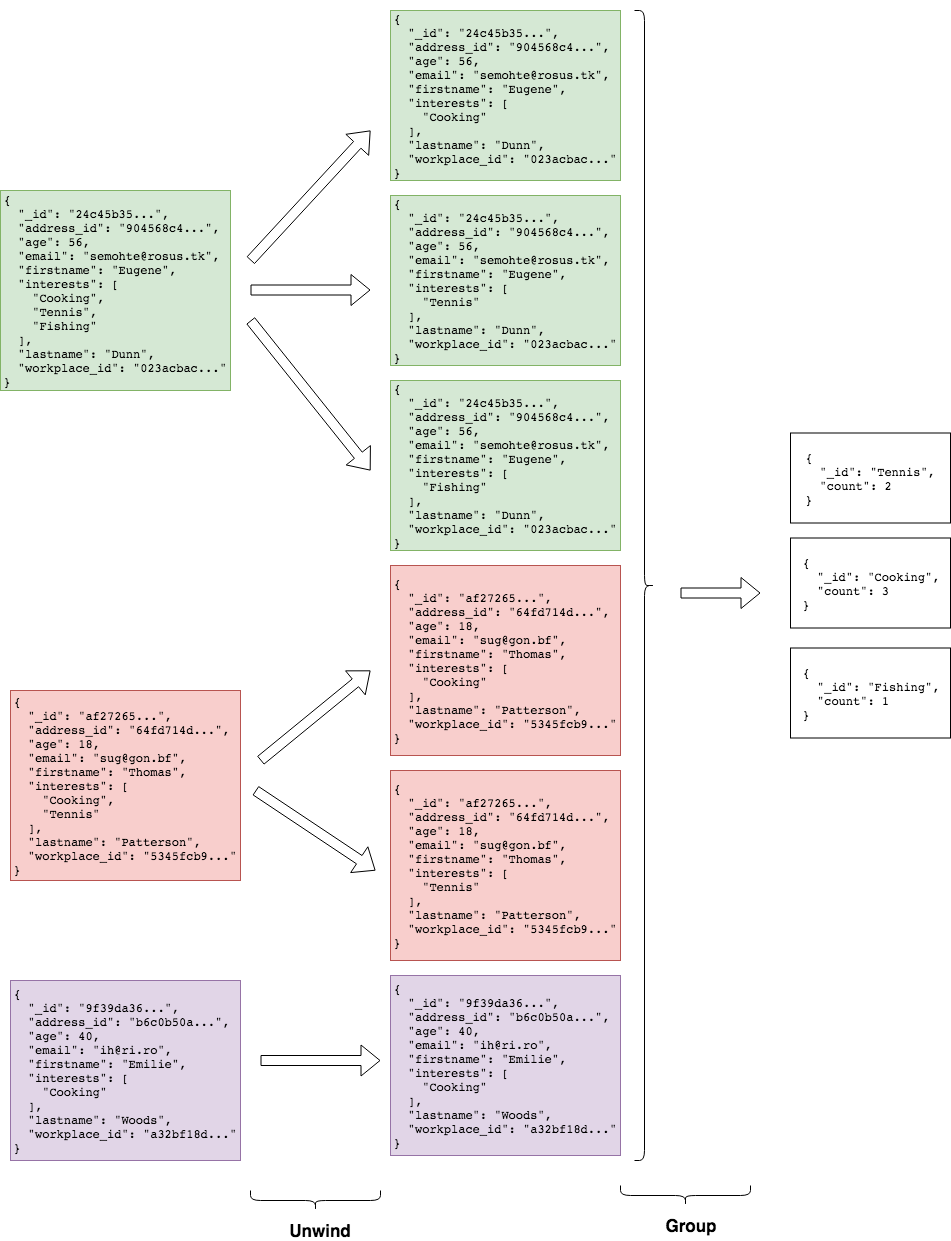
<center>Figure 5: Illustration showing documents being split into multiple documents, each with a copy of the same information except that they have only one of the several values taken from the interest field, then regrouping them into a new set of documents based on interest so we can count the number in each set.</center>

There are many different types of pipeline operations and expressions that can carry out rich aggregate queries. Refer to the [MongoDB pipeline documentation](https://docs.mongodb.com/manual/reference/aggregation/) for further reading.

In [ ]:
pipeline = [
     {"$unwind": "$interests"},
     {"$group": {"_id": "$interests", "count": {"$sum": 1}}}
]

query_result = list(db.employee.aggregate(pipeline))

# Let's store the results in a dataframe so that we can print the results in a table.
# Let's also rename the columns
df = pd.DataFrame(query_result) 
df.rename(columns={'_id': 'Interests', 'count': 'Employee Counts'}, inplace=True)
df

**End of Module**

You have reached the end of this module.

If you have any questions, please reach out to your peers using the discussion boards. If you
and your peers are unable to come to a suitable conclusion, do not hesitate to reach out to
your instructor on the designated discussion board.

When you are comfortable with the content, you may proceed to the next module.

# References

- MongoDB installation instructions. Install MongoDB Community Edition.  (Public Domain). Retrieved from https://docs.mongodb.com/manual/administration/install-community/


- MongoDB CRUD Operations. MongoDB Manual. (Public Domain). Retrieved from https://docs.mongodb.com/manual/crud/